In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import plotly.graph_objs as go # 3 차원 그릴떄 쓴다.

In [4]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper")
sns.set_palette("Set2")
sns.set_style("whitegrid")
plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

1. 미분
딥러닝의 이론을 공부할 때 미분을 빼놓고 이야기 할 수 없다!
미분: 어떤 점에서 함수의 기울기
대학에 가기 전에는 1변수 함수의 미분을 배운다.(교육강사의 교육과정에서... 요즘
은...?)
다음 함수 𝑓(𝑥)의 𝑥에 대한 도함수 (= (𝑥)) 계산해 보자.
𝑑𝑓
𝑑𝑥
𝑓
′
𝑓(𝑥) = 3𝑥 − 2𝑥 + 1


In [6]:
x = np.linspace(0, 4, 100)
f = lambda x: x**2 - 4*x + 6

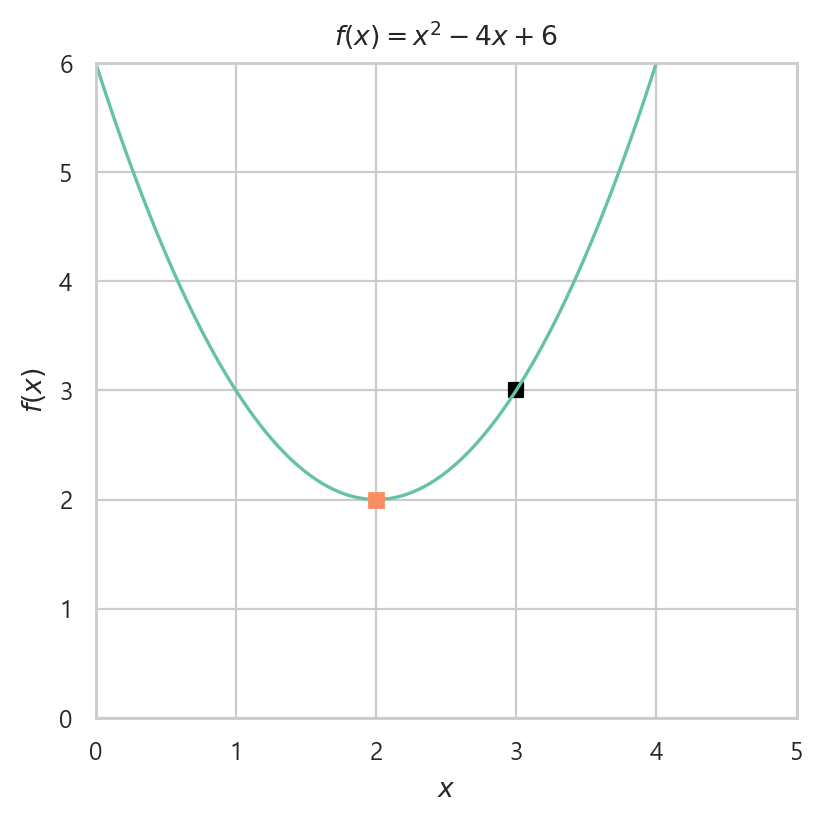

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, f(x))
ax.plot(2, 2, marker = "s" )
ax.set(xlim = (0,5), ylim = (0,6))
ax.scatter(3, f(3), marker = "s", color = "k")
ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = x^2 - 4x + 6$");


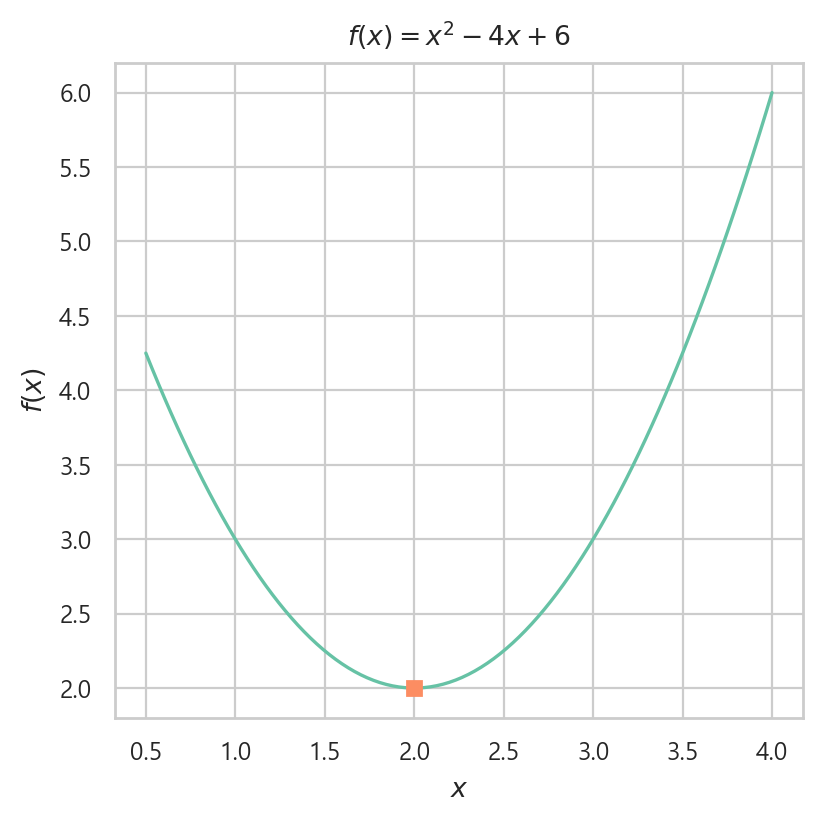

In [11]:
x = np.linspace(0.5, 4, 100)
f = lambda x: x**2 - 4*x + 6
grad_f = lambda x: 2*x - 4
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, f(x))
ax.plot(2, 2, marker = "s" )
ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = x^2 - 4x +6$");

In [9]:
def gradient_descent(f, grad_f, x_0, learning_rate, max_iter):
    paths = []
    for i in range(max_iter):
        x_1 = x_0 - learning_rate * grad_f(x_0)
        paths.append(x_1)
        x_0 = x_1
    return np.array(paths)

In [10]:
paths = gradient_descent(f, grad_f, 4.0, learning_rate=0.2, max_iter=10)

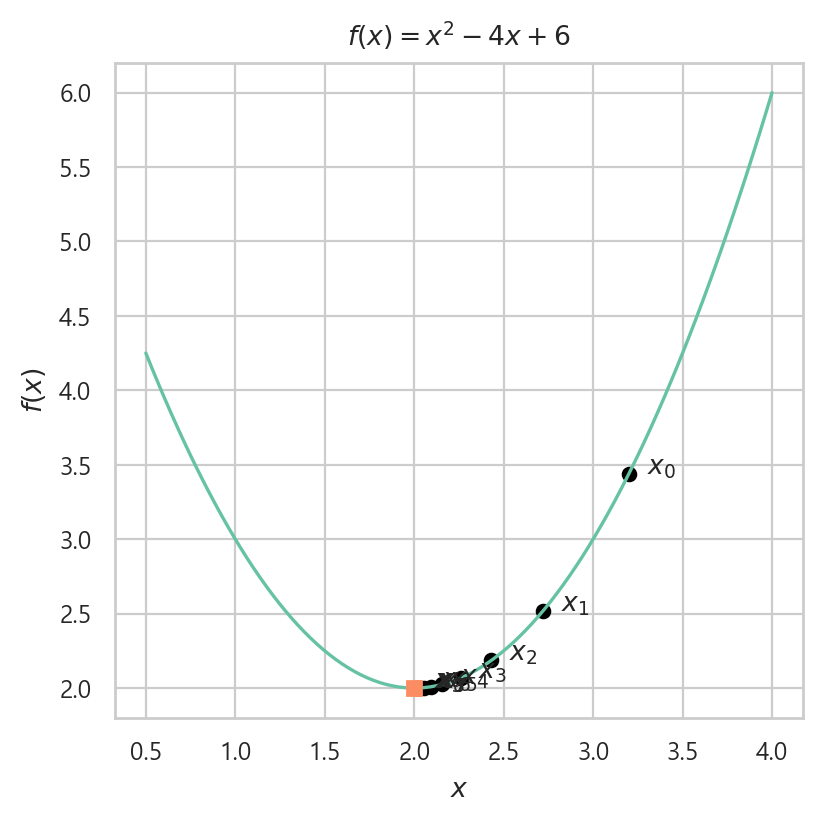

In [13]:
##
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, f(x))
ax.plot(2, 2, marker = "s" )
ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = x^2 - 4x + 6$")
ax.scatter(paths, f(paths), color = "k")
for k, point in enumerate(paths):
    ax.text(point+0.1, f(point), f'$x_{k}$')


In [15]:
paths = gradient_descent(f, grad_f, 4, learning_rate=0.01, max_iter=10)

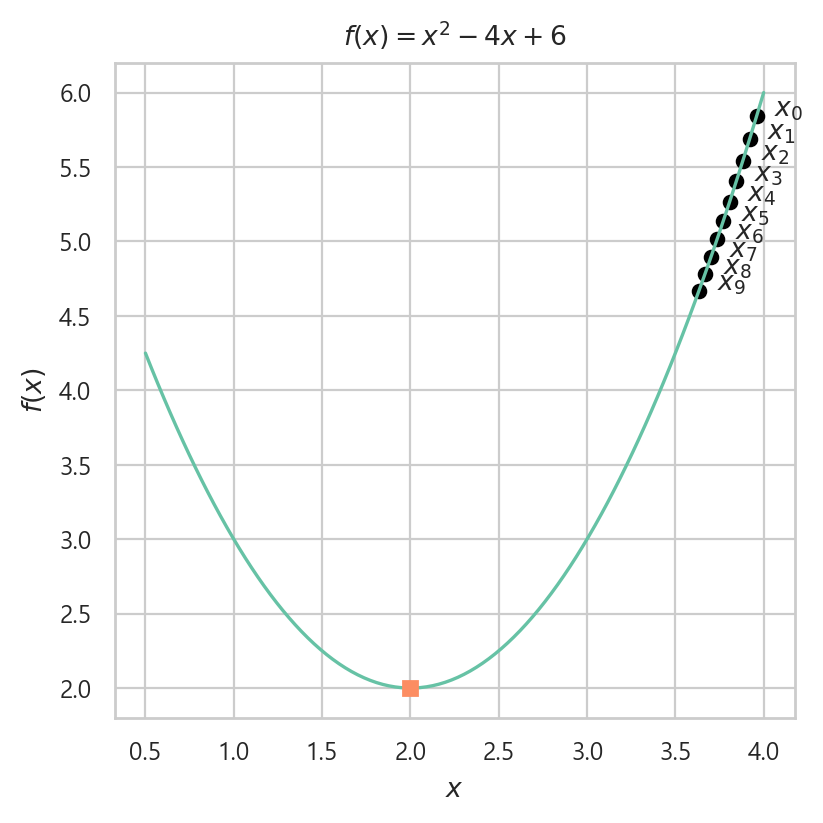

In [16]:
##
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, f(x))
ax.plot(2, 2, marker = "s" )
ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = x^2 - 4x + 6$")
ax.scatter(paths, f(paths), color = "k")
for k, point in enumerate(paths):
    ax.text(point+0.1, f(point), f'$x_{k}$')


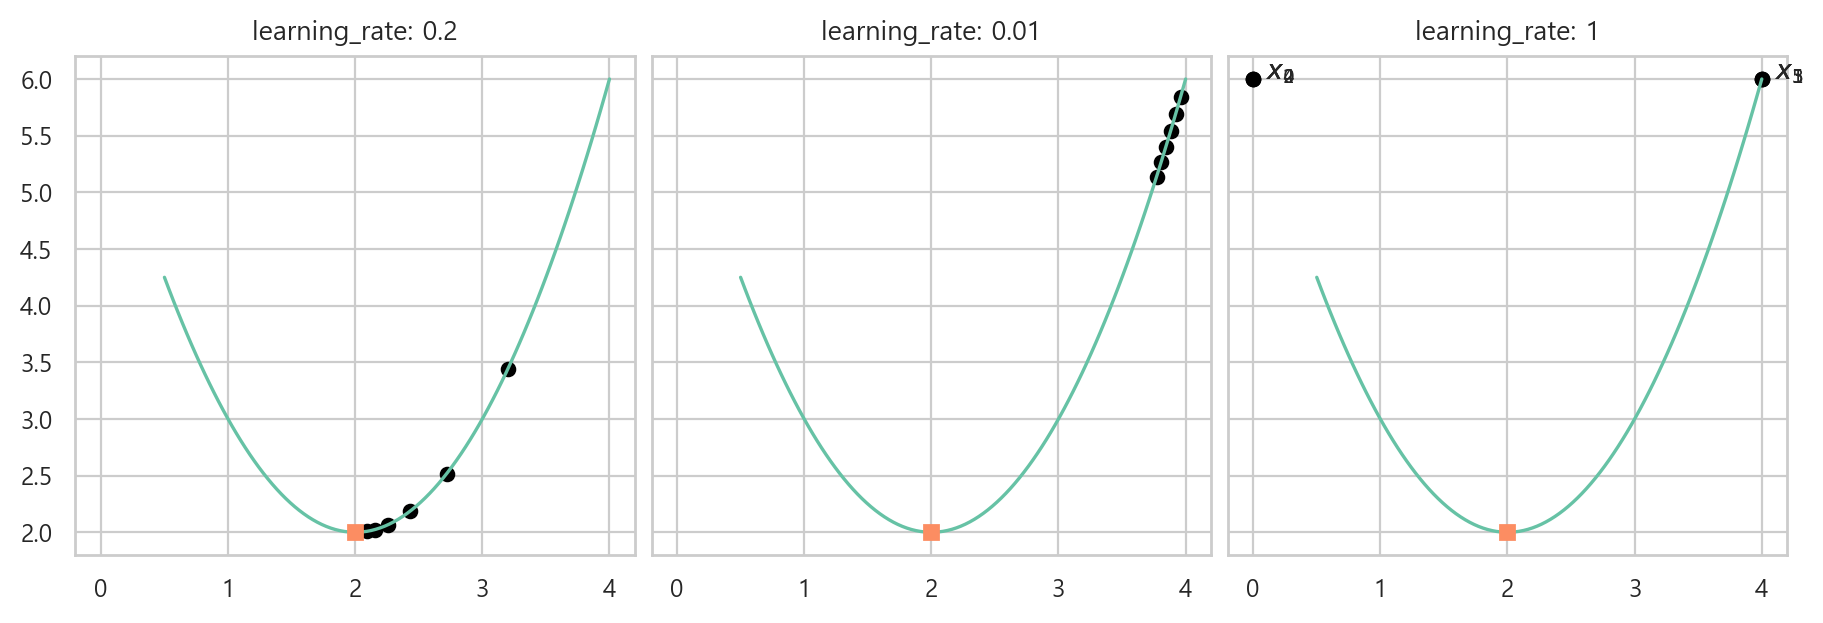

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex = True, sharey = True)
for lr, ax in zip([0.2, 0.01, 1], axes.flat):
    paths = gradient_descent(f, grad_f, 4, learning_rate=lr, max_iter=6)
    ax.plot(x, f(x))
    ax.plot(2, 2, marker = "s" )
    ax.set(title = f"learning_rate: {lr}")
    ax.scatter(paths, f(paths), color = "k")
for k, point in enumerate(paths):
    ax.text(point+0.1, f(point), f'$x_{k}$')


In [19]:
x = np.linspace(-1, 7, 100)
f = lambda x: x*np.sin(x)
grad_f = lambda x: np.sin(x) + x * np.cos(x)
## 초깃값의 민감성
paths_s = gradient_descent(f, grad_f, 2.5, learning_rate=0.25, max_iter=5)
paths_o = gradient_descent(f, grad_f, 1.5, learning_rate=0.25, max_iter=5)


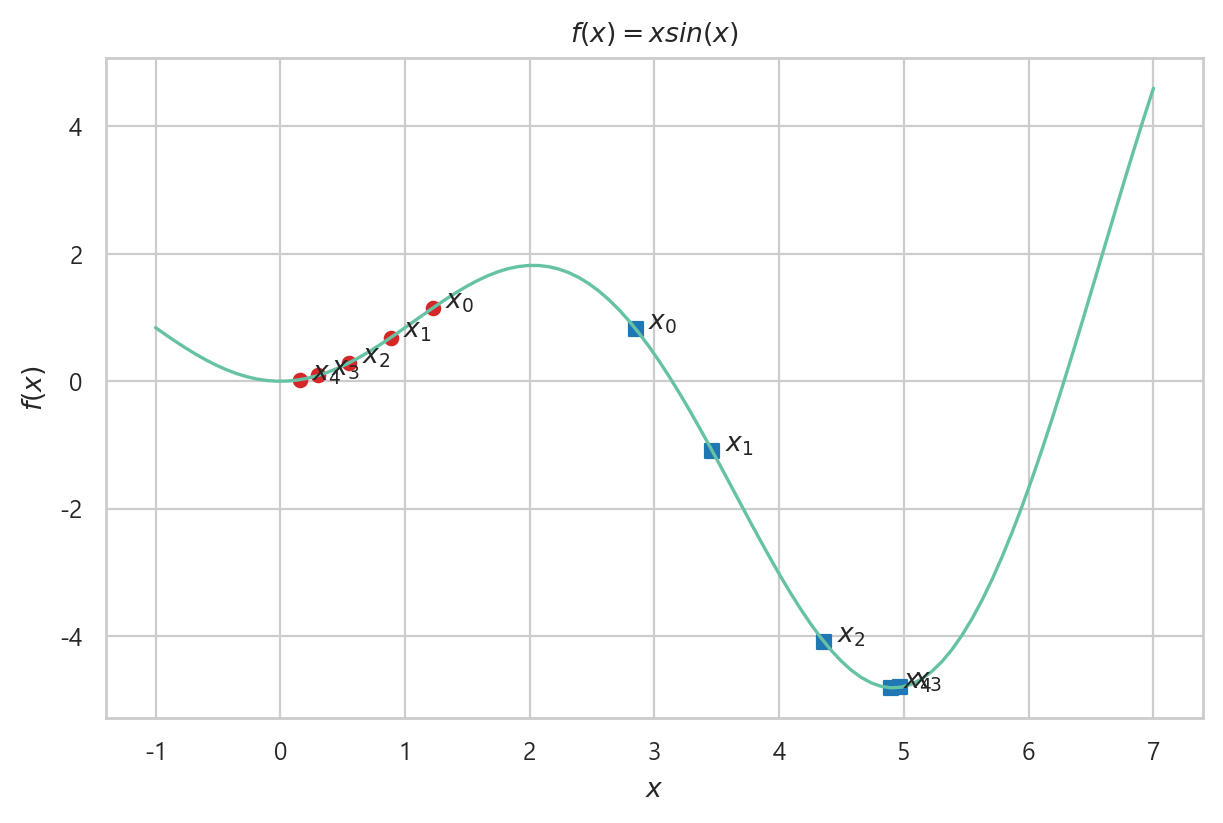

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f(x))
ax.scatter(paths_s, f(paths_s), marker = "s", color = "tab:blue")
ax.scatter(paths_o, f(paths_o), marker = "o", color = "tab:red")
for k, point in enumerate(paths_s):
    ax.text(point+0.1, f(point), f'$x_{k}$')
for k, point in enumerate(paths_o):
    ax.text(point+0.1, f(point), f'$x_{k}$')
    ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = xsin(x)$");

In [30]:
## GD 의 단점 두가지 (초기값과, 학습률)
paths_s = gradient_descent(f, grad_f, 2.5, learning_rate=1.0, max_iter=5)
paths_o = gradient_descent(f, grad_f, 2.5, learning_rate=0.05, max_iter=5)


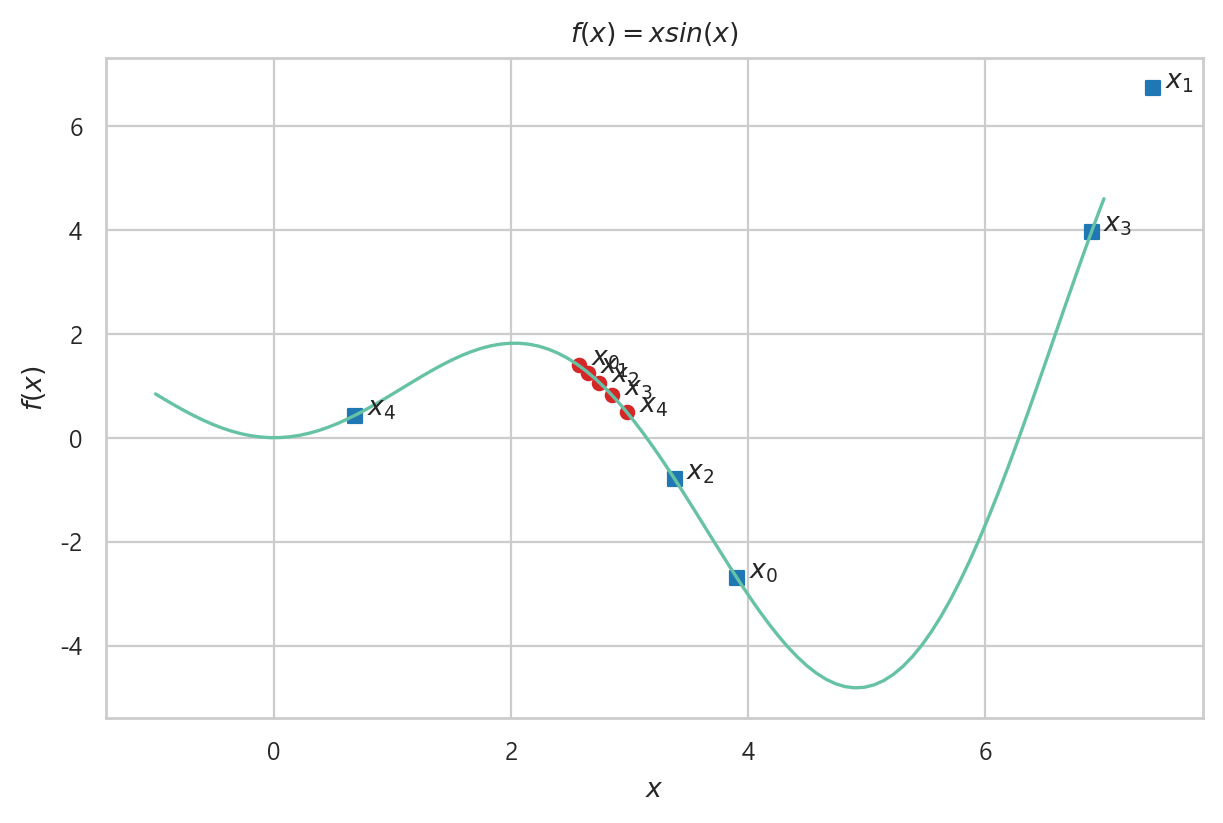

In [31]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f(x))
ax.scatter(paths_s, f(paths_s), marker = "s", color = "tab:blue")
ax.scatter(paths_o, f(paths_o), marker = "o", color = "tab:red")
for k, point in enumerate(paths_s):
    ax.text(point+0.1, f(point), f'$x_{k}$')
for k, point in enumerate(paths_o):
    ax.text(point+0.1, f(point), f'$x_{k}$')
ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = xsin(x)$");

In [33]:
x = np.outer(np.linspace(-5, 5, 5), np.ones((10,))) # 메쉬 만들기
y = x.copy().T

In [34]:
x = np.outer(np.linspace(-4, 5, 30), np.ones(30))
y = x.copy().T # transpose
z = 5*(x*np.cos(x)) + (2*y-1)**2
surface = go.Surface(x = x, y = y, z = z)
data = [surface]
layout = go.Layout(title = '3D Surface Plot')
fig = go.Figure(data = data, layout=layout)
fig.show()

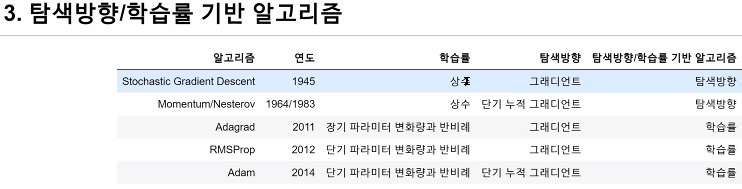

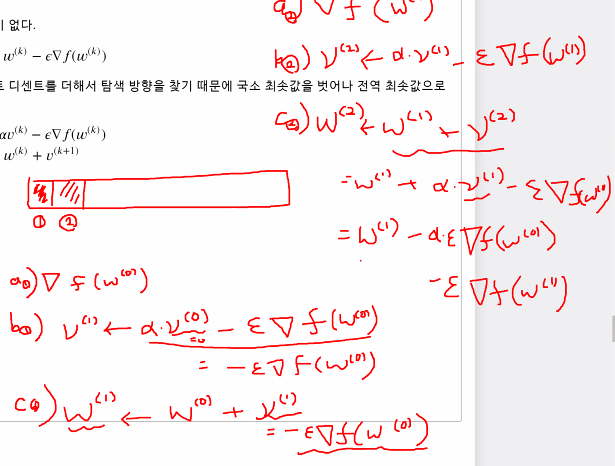

## SDG 설명

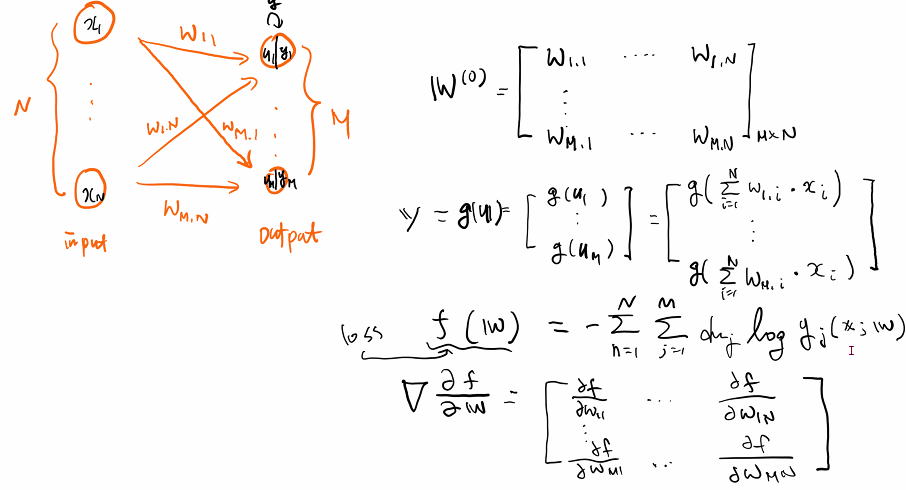

여기서 로스 펑션은 cross entropy

Nestrov : 속도에 대한 gred 까지 해줌

In [ ]:
!pip install tensorflow-addons


In [41]:
import tensorflow as tf
import tensorflow_addons as tfa

tfa.optimizers.AdaBelief()